## Collecting the best Brazil dataset

---

The most reliable dataset in Brazil was built by:

- [Wesly Cota](https://github.com/wcota/covid19br)

At this database we can found the most complete dataset going from cities to the country point of view. Mostly we have the information of the SIR components variations, _i.e._ the dailly new deaths, new recovered and new cases. 

In [1]:

import pandas as pd

wlcota_df = pd.read_csv(
    "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
wlcota_df.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN




This is actually the city level database from [Wesly Cota](https://github.com/wcota/covid19br). We can then create the default components of an epidemic __SIRD__ model _i.e._ the **S**uceptible (people that can be reached by the desease), the **I**nfected (or the dailly active cases of the desease), the **R**ecovered (accumulated values of people that recovered from the desease), and the **D**eaths (also accumulated value of the deaths). Country wise we have the following pattern for each component:

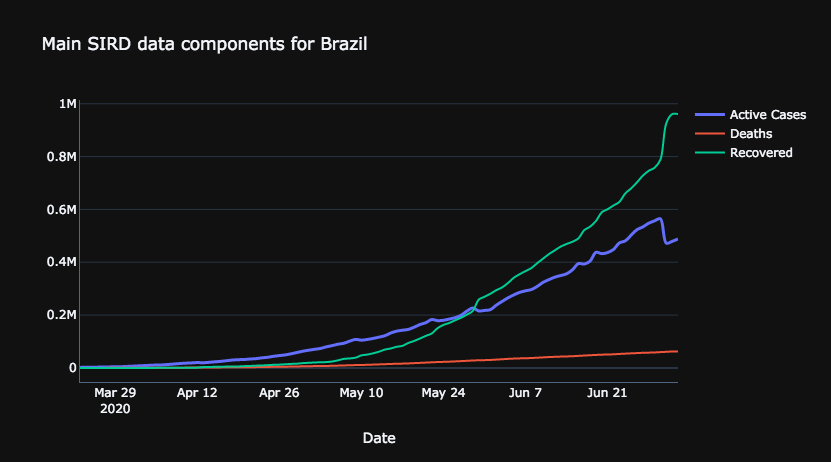

In [31]:

# Creating the correct component values
country_df = wlcota_df.where(wlcota_df["state"] == "TOTAL").dropna(subset=["state"]).reset_index()
country_df =  country_df[["date", "newDeaths", "deaths", "newCases", "totalCases", "recovered"]].dropna()
active_infected = [ country_df["totalCases"].iloc[0] ]
country_df["newRecovered"] = country_df["recovered"].diff()
for nc, nd, nr in zip(country_df["newCases"].iloc[1:], 
                      country_df["newDeaths"].iloc[1:], 
                      country_df["newRecovered"].iloc[1:]):
    active_infected.append(active_infected[-1] + nc - nd - nr)
country_df["activeCases"] = active_infected

# Plotting the correct results components
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Active Cases",
    x=country_df["date"],
    y=country_df["activeCases"],
    mode='lines',
    line_shape='spline',
    line=dict(width=3)))
fig.add_trace(go.Scatter(
    name="Deaths",
    x=country_df["date"],
    y=country_df["deaths"],
    mode='lines',
    line_shape='spline'))
fig.add_trace(go.Scatter(
    name="Recovered",
    x=country_df["date"],
    y=country_df["recovered"],
    mode='lines',
    line_shape='spline'))
fig.update_layout(
    template='plotly_dark',
    xaxis=dict(showgrid=False),
    xaxis_title='Date',
    title_text="Main SIRD data components for Brazil")

fig.show()

We can also break down each component into their state portions, to build a more focus model, since Brazil is a pretty big country. It is probable that severeal different dynamic behaviors will present themselves for each state in Brazil. As an example, lets checkout the recovered data for each state, as an example.


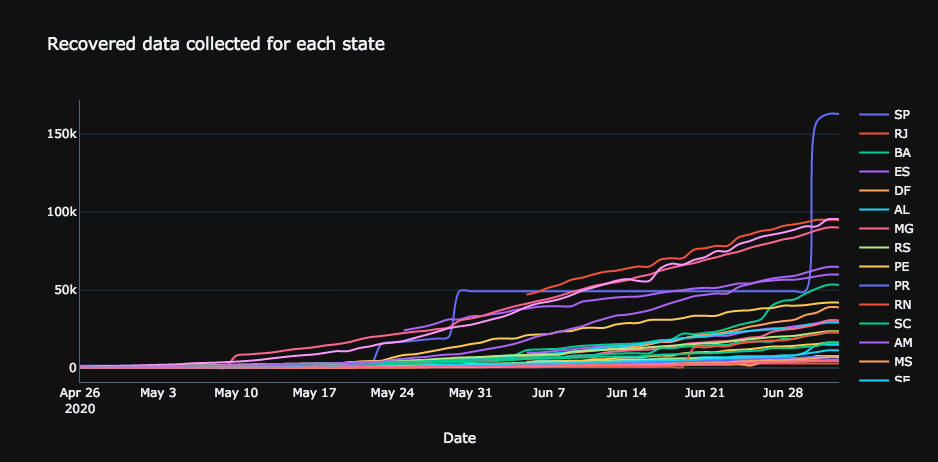

In [42]:
# Get the state labels
states_list = wlcota_df["state"].unique().tolist()
states_list.pop(states_list.index("TOTAL"))

# Plot the recovered data at each state
fig = go.Figure()
for state in states_list:
    state_df = wlcota_df.where(wlcota_df["state"]==state).dropna()
    fig.add_trace(go.Scatter(
        name=state,
        x=state_df["date"],
        y=state_df["recovered"],
        mode='lines',
        line_shape='spline'))
    
fig.update_layout(
    template='plotly_dark',
    xaxis=dict(showgrid=False),
    xaxis_title='Date',
    title_text="Recovered data collected for each state")
fig.show()


Notice, that most states do not have a continuous collection during the epidemic (a common phenomenon in Brazil... usually most datasets are filled with gaps, or biased as you can see in the SP state). Therefore **we cannot fully trust the dataset... but we can create some algorithms to map only the informative collection of points of each state, and then we will only use those points to train our model!** 

## Preprocessing the components time series
---

This can be done using a derivative based technique, that will track the derivative of a sequence of points, and it will only consider informative the points whose derivative has some absolute value bigger than a particular thershold. And also, since we have some periods with no data collected (the series gaps), we can fill the void space with contant values... This is a pretty interesting approach 

In [ ]:
# Showing the components
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Active Cases (I)",
    x=wlcota_df[]
))

for state in states:
    state_df = wlcota_df.where(wlcota_df["state"]==state).dropna()
    fig.add_trace(go.Scatter(
        name=state,
        x=state_df["date"],
        y=state_df["recovered"],
        mode='lines',
        line_shape='spline'))
    
fig.update_layout(template='plotly_dark',
                  xaxis_title='Data', yaxis_title='Indivíduos',
                  title_text="Recuperados por estado do Brasil")
fig.show()